In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [74]:
data_visualize = pd.read_csv("DATE.csv")

data_visualize

,plant_date,DoY,(delta)PD
0,0.2083,237.2083,-0.1
1,0.4583,237.4583,-0.1
2,0.6250,237.6250,-0.1
3,0.6667,237.6667,-0.1
4,0.7083,237.7083,-0.1
...,...,...,...
407,40.8750,277.8750,-0.1
408,41.0000,278.0000,-0.1
409,41.0833,278.0833,-0.1
410,41.2083,278.2083,-0.1


In [100]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 10000
DISPLAY_STEP = 1000

X_LABLE = len(data_visualize.columns) - 1

W_PRED = 0

In [101]:
data = np.loadtxt("DATE_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, shuffle = False)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [103]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')
        
        W_PRED = w.numpy()

step: 1000 
 w: 
 [[ 0.09448382]
 [-0.00652316]] 
 bias: -0.031823356 
 loss: 0.5553216 

step: 2000 
 w: 
 [[ 0.03289802]
 [-0.00258369]] 
 bias: -0.02318091 
 loss: 0.07329321 

step: 3000 
 w: 
 [[ 0.00584626]
 [-0.00085336]] 
 bias: -0.019382188 
 loss: 0.012208803 

step: 4000 
 w: 
 [[ 0.00155528]
 [-0.0005789 ]] 
 bias: -0.018779546 
 loss: 0.010969221 

step: 5000 
 w: 
 [[ 0.00140226]
 [-0.00056911]] 
 bias: -0.01875808 
 loss: 0.01096774 

step: 6000 
 w: 
 [[ 0.00140177]
 [-0.00056908]] 
 bias: -0.01875808 
 loss: 0.010967739 

step: 7000 
 w: 
 [[ 0.00140177]
 [-0.00056908]] 
 bias: -0.01875808 
 loss: 0.010967739 

step: 8000 
 w: 
 [[ 0.00140176]
 [-0.00056908]] 
 bias: -0.01875808 
 loss: 0.010967739 

step: 9000 
 w: 
 [[ 0.00140176]
 [-0.00056908]] 
 bias: -0.01875808 
 loss: 0.010967739 

step: 10000 
 w: 
 [[ 0.00140176]
 [-0.00056908]] 
 bias: -0.01875808 
 loss: 0.010967739 



In [104]:
y_hat = tf.matmul(x_test, W_PRED) + bias

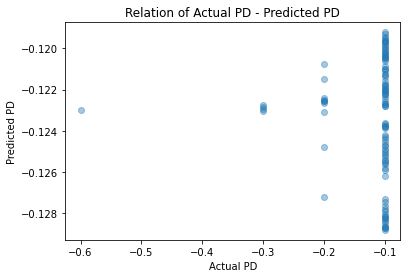

In [105]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [106]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.0669288
MAE: 0.03899702
